Theoretical Mean (λ): 5.000
Sample Mean: 4.995
Theoretical Variance (λ): 5.000
Sample Variance: 5.081


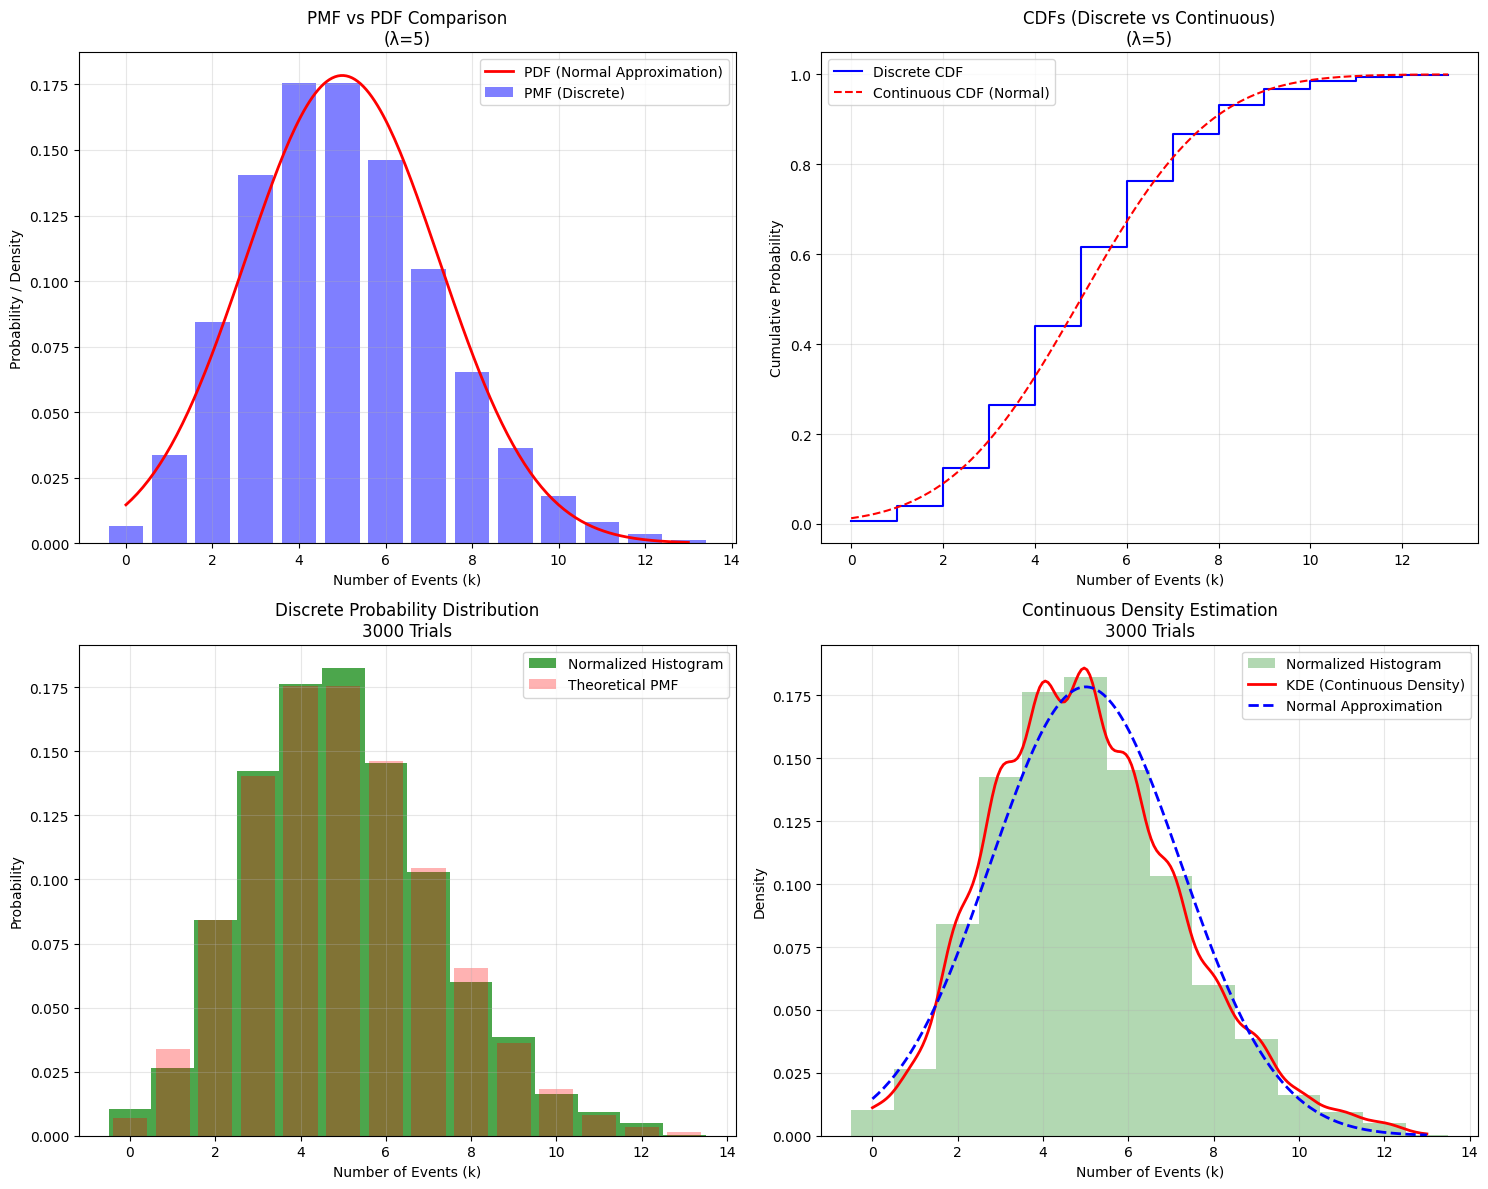

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

def poisson_pmf(lambda_param, k_max=None):
    """
    Calculate Probability Mass Function for Poisson distribution
    """
    if k_max is None:
        k_max = int(lambda_param + 4 * np.sqrt(lambda_param))
    x = np.arange(0, k_max + 1)
    pmf = stats.poisson.pmf(x, lambda_param)
    return x, pmf

def poisson_pdf_approximation(lambda_param):
    """
    Calculate continuous approximation (PDF) for Poisson distribution
    Using Normal approximation when lambda is large enough
    """
    k_max = int(lambda_param + 4 * np.sqrt(lambda_param))
    x = np.linspace(0, k_max, 200)
    # Normal approximation to Poisson
    pdf = stats.norm.pdf(x, lambda_param, np.sqrt(lambda_param))
    return x, pdf

def poisson_cdf(lambda_param, k_max=None):
    """
    Calculate Cumulative Distribution Function for Poisson distribution
    """
    if k_max is None:
        k_max = int(lambda_param + 4 * np.sqrt(lambda_param))
    x = np.arange(0, k_max + 1)
    cdf = stats.poisson.cdf(x, lambda_param)
    return x, cdf

def simulate_poisson(lambda_param, n_samples):
    """
    Simulate n_samples from Poisson distribution
    """
    return np.random.poisson(lambda_param, size=n_samples)

def plot_poisson_distribution(lambda_param, n_samples=1000):
    """
    Create comprehensive visualization of Poisson distribution
    including PMF, PDF, CDF, and density estimations
    """
    k_max = int(lambda_param + 4 * np.sqrt(lambda_param))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PMF and PDF Comparison
    x_pmf, pmf = poisson_pmf(lambda_param, k_max)
    x_pdf, pdf = poisson_pdf_approximation(lambda_param)
    
    # Plot PMF as bars
    ax1.bar(x_pmf, pmf, alpha=0.5, color='blue', label='PMF (Discrete)')
    # Plot PDF as continuous approximation
    ax1.plot(x_pdf, pdf, 'r-', label='PDF (Normal Approximation)', linewidth=2)
    
    ax1.set_title(f'PMF vs PDF Comparison\n(λ={lambda_param})')
    ax1.set_xlabel('Number of Events (k)')
    ax1.set_ylabel('Probability / Density')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CDF
    x_cdf, cdf = poisson_cdf(lambda_param, k_max)
    ax2.step(x_cdf, cdf, 'b-', label='Discrete CDF', where='post')
    
    # Add continuous CDF approximation
    x_cont = np.linspace(0, k_max, 200)
    cdf_cont = stats.norm.cdf(x_cont, lambda_param, np.sqrt(lambda_param))
    ax2.plot(x_cont, cdf_cont, 'r--', label='Continuous CDF (Normal)')
    
    ax2.set_title(f'CDFs (Discrete vs Continuous)\n(λ={lambda_param})')
    ax2.set_xlabel('Number of Events (k)')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Generate samples
    samples = simulate_poisson(lambda_param, n_samples)
    
    # Plot 3: Histogram with PMF
    bins = np.arange(-0.5, k_max + 1.5, 1)
    ax3.hist(samples, bins=bins, density=True, alpha=0.7,
             color='green', label='Normalized Histogram')
    ax3.bar(x_pmf, pmf, alpha=0.3, color='red', label='Theoretical PMF')
    
    ax3.set_title(f'Discrete Probability Distribution\n{n_samples} Trials')
    ax3.set_xlabel('Number of Events (k)')
    ax3.set_ylabel('Probability')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Density Estimation
    ax4.hist(samples, bins=bins, density=True, alpha=0.3,
             color='green', label='Normalized Histogram')
    
    # KDE (continuous density estimation)
    kde = gaussian_kde(samples, bw_method='scott')
    x_kde = np.linspace(0, k_max, 200)
    ax4.plot(x_kde, kde(x_kde), 'r-', label='KDE (Continuous Density)', linewidth=2)
    
    # Add theoretical PDF approximation
    ax4.plot(x_pdf, pdf, 'b--', label='Normal Approximation', linewidth=2)
    
    ax4.set_title(f'Continuous Density Estimation\n{n_samples} Trials')
    ax4.set_xlabel('Number of Events (k)')
    ax4.set_ylabel('Density')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

# Example usage
lambda_param = 5  # mean number of events
n_samples = 3000

# Calculate theoretical mean and variance
mean = lambda_param
variance = lambda_param

# Generate samples
samples = simulate_poisson(lambda_param, n_samples)

# Calculate sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

# Print statistics
print(f"Theoretical Mean (λ): {mean:.3f}")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Theoretical Variance (λ): {variance:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")

# Create and display plot
plot_poisson_distribution(lambda_param, n_samples)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

def poisson_pmf(lambda_param, k_max=None):
    """
    Calculate Probability Mass Function for Poisson distribution
    """
    if k_max is None:
        k_max = int(lambda_param + 4 * np.sqrt(lambda_param))
    x = np.arange(0, k_max + 1)
    pmf = stats.poisson.pmf(x, lambda_param)
    return x, pmf

def plot_multiple_poisson(lambda_values):
    """
    Create visualization comparing Poisson distributions with different lambda values
    """
    # Calculate maximum k value needed
    k_max = int(max(lambda_values) + 4 * np.sqrt(max(lambda_values)))
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Color map for different lambda values
    colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
    
    # Plot 1: PMF Comparison
    for lambda_param, color in zip(lambda_values, colors):
        x, pmf = poisson_pmf(lambda_param, k_max)
        ax1.plot(x, pmf, 'o-', color=color, label=f'λ={lambda_param}', alpha=0.7)
    
    ax1.set_title('PMF Comparison for Different λ Values')
    ax1.set_xlabel('Number of Events (k)')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CDF Comparison
    for lambda_param, color in zip(lambda_values, colors):
        x = np.arange(0, k_max + 1)
        cdf = stats.poisson.cdf(x, lambda_param)
        ax2.step(x, cdf, color=color, label=f'λ={lambda_param}', alpha=0.7, where='post')
    
    ax2.set_title('CDF Comparison for Different λ Values')
    ax2.set_xlabel('Number of Events (k)')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Plot 3: Simulated Histograms
    n_samples = 1000
    bins = np.arange(-0.5, k_max + 1.5, 1)
    
    for lambda_param, color in zip(lambda_values, colors):
        samples = np.random.poisson(lambda_param, n_samples)
        ax3.hist(samples, bins=bins, density=True, alpha=0.3,
                 color=color, label=f'λ={lambda_param}')
        
    ax3.set_title(f'Simulated Distributions\n({n_samples} samples each)')
    ax3.set_xlabel('Number of Events (k)')
    ax3.set_ylabel('Density')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Normal Approximations
    x = np.linspace(0, k_max, 200)
    for lambda_param, color in zip(lambda_values, colors):
        # Normal approximation
        pdf = stats.norm.pdf(x, lambda_param, np.sqrt(lambda_param))
        ax4.plot(x, pdf, '--', color=color, label=f'λ={lambda_param}', alpha=0.7)
        
        # Add points for actual PMF
        x_pmf, pmf = poisson_pmf(lambda_param, k_max)
        ax4.plot(x_pmf, pmf, 'o', color=color, alpha=0.5, markersize=4)
    
    ax4.set_title('Normal Approximation Comparison\n(dots show actual PMF)')
    ax4.set_xlabel('Number of Events (k)')
    ax4.set_ylabel('Probability Density')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

# Example usage with multiple lambda values
lambda_values = [1, 3, 5, 10]

# Create and display plots
plot_multiple_poisson(lambda_values)
plt.show()

# Print theoretical statistics for each lambda
print("\nTheoretical Statistics:")
print("-" * 40)
for lambda_param in lambda_values:
    print(f"\nFor λ = {lambda_param}:")
    print(f"Mean = {lambda_param:.2f}")
    print(f"Variance = {lambda_param:.2f}")
    print(f"Standard Deviation = {np.sqrt(lambda_param):.2f}")